In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT as root
import simulacion as s

Welcome to JupyROOT 6.30/04


# ANALYSIS OF UNCERTAINTY

## Area under roc curves

In [162]:
list_sigma=[]
list_linear=[]
graphs=[]
graphs_linear=[]

In [163]:
Npix = 64
nct_list = [5,10,20,40,80]
t = 4
for nct in nct_list:
    x,y,xe,ye1 = s.areacontraste(Npix,nct,t,False,False)
    x,y,xe,ye2 = s.areacontraste(Npix,nct,t,False,True)
    list_sigma.append(ye1)
    list_linear.append(ye2)



In [40]:
np.max(np.log(list_sigma[4])-np.log(list_sigma[0]))

0.6423901947492228

In [164]:
print(x)
graphs = []
graphs_linear = []

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


In [165]:
for k in range(5):
    ye1 = list_sigma[k]
    ye2 = list_linear[k]
    graph = root.TGraph(len(x))
    graph_linear = root.TGraph(len(x))
    for i in range(len(x)):
        graph.SetPoint(i,x[i],np.log(ye1[i])/np.log(10))
        graph_linear.SetPoint(i,x[i],np.log(ye2[i])/np.log(10))
    graphs.append(graph)
    graphs_linear.append(graph_linear)


/tmp/ipykernel_72981/2088003478.py:8: RuntimeWarning: divide by zero encountered in log
  graph_linear.SetPoint(i,x[i],np.log(ye2[i])/np.log(10))


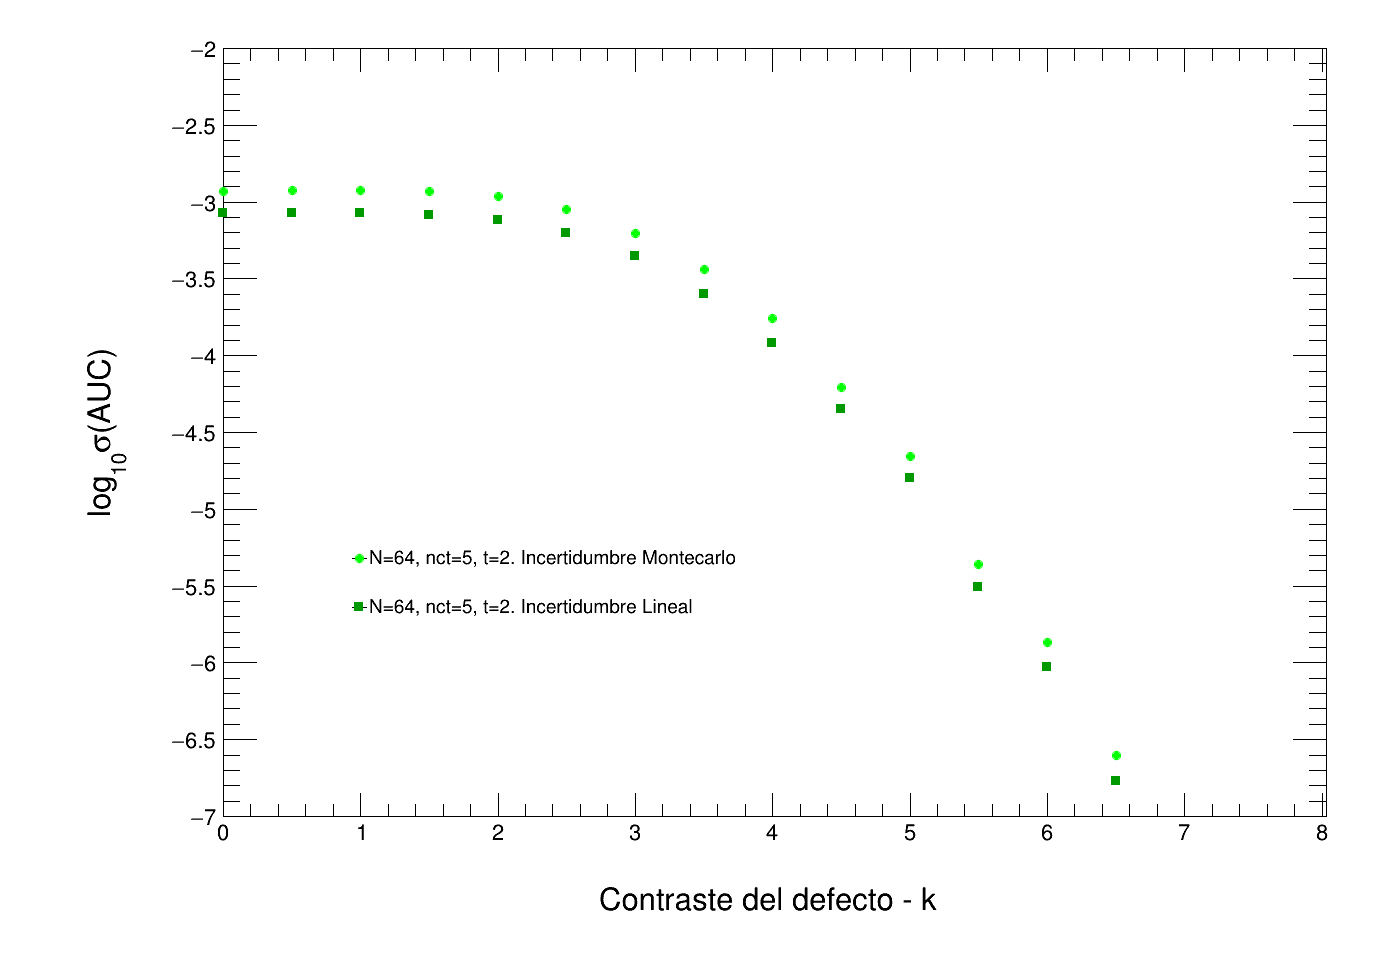

In [264]:

graphs[0].SetTitle("Incertidumbre AUC")
graphs[0].SetTitle("Curvas Contraste-Tamaño")
graphs[0].GetXaxis().SetTitle("Contraste del defecto - k")
graphs[0].GetYaxis().SetTitle("log_{10}#sigma(AUC)")
graphs[0].GetXaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetYaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetXaxis().CenterTitle()
graphs[0].GetYaxis().CenterTitle()
graphs[0].GetXaxis().SetTitleOffset(1.5) 
graphs[0].GetYaxis().SetTitleOffset(1.5) 
graphs[0].GetXaxis().SetRangeUser(0,8)
graphs[0].GetYaxis().SetRangeUser(-7,-2)
graphs[0].GetXaxis().SetLabelSize(0.025)  # Adjust the size as needed
graphs[0].GetYaxis().SetLabelSize(0.025)  # Adjust the size as needed


for k in range(5):
    graphs[k].SetMarkerStyle(20)
    graphs_linear[k].SetMarkerStyle(21)
   
graphs[1].SetMarkerColor(root.kBlue)
graphs_linear[1].SetMarkerColor(root.kBlue)
graphs[2].SetMarkerColor(root.kRed)
graphs_linear[2].SetMarkerColor(root.kRed)
graphs[3].SetMarkerColor(root.kGreen)
graphs_linear[3].SetMarkerColor(root.kGreen)
graphs[0].SetMarkerColor(root.kGreen)
graphs_linear[0].SetMarkerColor(root.kGreen+2)
root.gROOT.SetStyle("ATLAS")
root.gROOT.ForceStyle()

# Increase canvas size and set resolution
canvas = root.TCanvas('', '', 1400, 1000)  # Increase width and height for higher resolution


#graphs[1].Draw('P SAME')
#graphs_linear[1].Draw('P SAME')
graphs[0].Draw('AP')
graphs_linear[0].Draw('P SAME')

legend = root.TLegend(0.25, 0.35, 0.40, 0.45)
legend.SetEntrySeparation(0.05)
legend.SetBorderSize(0)
legend.SetMargin(0.1)
legend.AddEntry(graphs[0],"N=64, nct=5, t=2. Incertidumbre Montecarlo")
legend.AddEntry(graphs_linear[0],"N=64, nct=5, t=2. Incertidumbre Lineal")

legend.SetTextFont(40)  # 42 is the font code for LaTeX-compatible fonts
legend.SetTextSize(0.021)  # Adjust the font size as needed

legend.Draw()
canvas.Draw()

In [4]:
list_sigma=[]
list_linear=[]
graphs=[]
graphs_linear=[]

In [5]:
Npix = 64
nct = 20
t_list = [1,2,3,4,5]
for t in t_list:
    x,y,xe,ye1 = s.areacontraste(Npix,nct,t,False,False)
    x,y,xe,ye2 = s.areacontraste(Npix,nct,t,False,True)
    list_sigma.append(ye1)
    list_linear.append(ye2)


In [8]:
for i in range(len(list_sigma)):
    print(1e3*np.max(list_sigma[i]))
    print(1e3*np.max(list_linear[i]))
    print(100*(np.max(list_sigma[i])-np.max(list_linear[i]))/np.max(list_sigma[i]))
    print("")

1.6895965806004596
1.1899344248484853
29.57286736307203

1.6918130630776278
1.1899043038175465
29.66691593851652

1.6856095345962276
1.1906907952056236
29.36141076759851

1.6679298870532784
1.1876922563281072
28.79243512888927

1.6790000667166507
1.1876922563281072
29.26192917605506



In [9]:
list_sigma=[]
list_linear=[]
graphs=[]
graphs_linear=[]

In [10]:
Npix = 64
nct_list = [5,10,20,40,80]
t = 2
for nct in nct_list:
    x,y,xe,ye1 = s.areacontraste(Npix,nct,t,False,False)
    x,y,xe,ye2 = s.areacontraste(Npix,nct,t,False,True)
    list_sigma.append(ye1)
    list_linear.append(ye2)

In [11]:
for i in range(len(list_sigma)):
    print(1e3*np.max(list_sigma[i]))
    print(1e3*np.max(list_linear[i]))
    print(100*(np.max(list_sigma[i])-np.max(list_linear[i]))/np.max(list_sigma[i]))
    print("")

1.1960664306912279
0.8477717817408794
29.120008723015733

1.4087706299953557
1.0012472916566844
28.92758619904043

1.6801653981178475
1.1899043038175465
29.179335251725846

1.9732834290896109
1.406263525214259
28.73484343488105

2.3140083865606678
1.6528442053090093
28.572246543771307



In [6]:
list_sigma=[]
list_linear=[]
graphs=[]
graphs_linear=[]

In [7]:

nct_list = [5,10,20,40,80]
for nct in nct_list:
    x,y,ye = s.contrastedetalle(64,nct)
    list_sigma.append(ye)


****************************************
Minimizer is Linear / Migrad
Chi2                      =    0.0697674
NDf                       =            8
p0                        =      6.74341   +/-   0.162076    
p1                        =    -0.583356   +/-   0.0205629   
****************************************
Minimizer is Linear / Migrad
Chi2                      =     0.055639
NDf                       =            9
p0                        =      6.80604   +/-   0.114923    
p1                        =     -0.59023   +/-   0.0149935   
****************************************
Minimizer is Linear / Migrad
Chi2                      =     0.101371
NDf                       =            9
p0                        =      6.61705   +/-   0.155122    
p1                        =    -0.567408   +/-   0.0202381   
****************************************
Minimizer is Linear / Migrad
Chi2                      =    0.0986899
NDf                       =            8
p0                  

Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>: TLinearFitter failed in finding the solution
Warning in <Fit>: Abnormal termination of minimization.


In [8]:
for k in range(5):
    ye = list_sigma[k]
    graph = root.TGraph(len(x))
    for i in range(len(x)):
        graph.SetPoint(i,x[i],np.log(ye[i])/np.log(10))
    graphs.append(graph)

/tmp/ipykernel_940/2127214098.py:5: RuntimeWarning: divide by zero encountered in log
  graph.SetPoint(i,x[i],np.log(ye[i])/np.log(10))


In [10]:
graphs[4].SetPoint(4,5,-3) #the last point gets saturated - no physical meaning

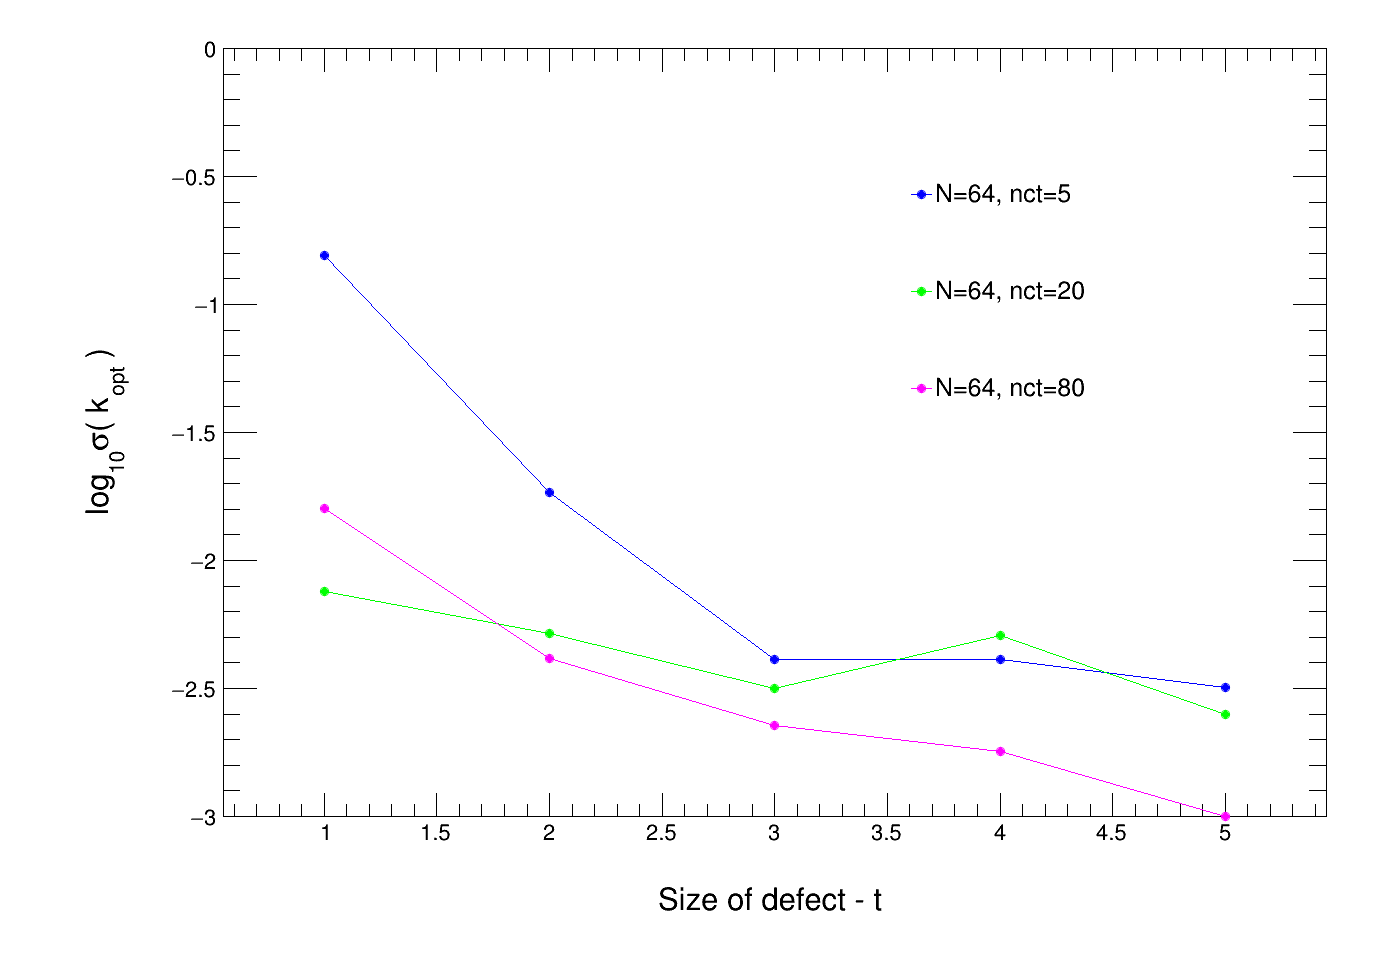

In [14]:
graphs[0].SetTitle("Incertidumbre contraste optimo")
graphs[0].GetXaxis().SetTitle("Size of defect - t")
graphs[0].GetYaxis().SetTitle("log_{10}#sigma( k_{opt} )")
graphs[0].GetXaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetYaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetXaxis().CenterTitle()
graphs[0].GetYaxis().CenterTitle()
graphs[0].GetXaxis().SetTitleOffset(1.5) 
graphs[0].GetYaxis().SetTitleOffset(1.5) 
graphs[0].GetXaxis().SetRangeUser(0,6)
graphs[0].GetYaxis().SetRangeUser(-3,0)
graphs[0].GetXaxis().SetLabelSize(0.025)  # Adjust the size as needed
graphs[0].GetYaxis().SetLabelSize(0.025)  # Adjust the size as needed


for k in range(5):
    graphs[k].SetMarkerStyle(20)

graphs[0].SetMarkerColor(root.kBlue)
graphs[1].SetMarkerColor(root.kRed)
graphs[2].SetMarkerColor(root.kGreen)
graphs[3].SetMarkerColor(root.kOrange)
graphs[4].SetMarkerColor(root.kMagenta)
graphs[0].SetLineColor(root.kBlue)
graphs[1].SetLineColor(root.kRed)
graphs[2].SetLineColor(root.kGreen)
graphs[3].SetLineColor(root.kOrange)
graphs[4].SetLineColor(root.kMagenta)


root.gROOT.SetStyle("ATLAS")
root.gROOT.ForceStyle()

# Increase canvas size and set resolution
canvas = root.TCanvas('', '', 1400, 1000)  # Increase width and height for higher resolution


#graphs[1].Draw('P SAME')
#graphs_linear[1].Draw('P SAME')
graphs[0].Draw('APL')
#graphs[1].Draw('P SAME')
graphs[2].Draw('PL SAME')
#graphs[3].Draw('P SAME')
graphs[4].Draw('PL SAME')


legend = root.TLegend(0.65, 0.55, 0.85, 0.85)
legend.SetEntrySeparation(0.05)
legend.SetBorderSize(0)
legend.SetMargin(0.1)
legend.AddEntry(graphs[0],"N=64, nct=5")
legend.AddEntry(graphs[2],"N=64, nct=20")
legend.AddEntry(graphs[4],"N=64, nct=80")
legend.SetTextFont(42)  # 42 is the font code for LaTeX-compatible fonts
legend.SetTextSize(0.028)  # Adjust the font size as needed
legend.Draw()


canvas.Draw()